In [32]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 
import seaborn as sns


import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


In [33]:
def get_arrays(data , N):
    '''
        Inputs : data (2d array format) , N (number of migrad fits)
        
        Splits the csv data in two arrays for amplitudes and associated errors, both of dimension (N , 48) 
    '''
    raw_data=data[0:N,:]
    coefs , errors = np.zeros((N , 48)) , np.zeros((N , 48))
    for i in range(0,96,2):
        coefs[: , int(i/2)]= raw_data[: , i]
        errors[: , int(i/2)]= raw_data[: , i+1]
    return coefs , errors


In [2]:
#first we need to generate some data ...

N_events=2400

toy_signalSM=toy('SM')
toy_signalNP=toy('NP')

toy_signalSM.generate(events=N_events , verbose=True)
toy_signalNP.generate(events=N_events , verbose=True)


Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.148130655288696
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.062183856964111


In [69]:
X=[]
print(fix_array)
fix_array=[0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           1, 1, 1,
           0, 0, 0,
           1, 1, 1,
           1, 1, 1,
           1, 1, 1,
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1]

#fix_array=fix_alphas
print(fix_array)

for j in tqdm(range(10)):
    optimizeTF , coeffff = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=fix_array , verbose=False)
    X.append(coeffff)
    print('ID : ',toy_signalSM.coeffs)
    print('FIT :', coeffff)
X=np.asarray(X)



  0%|          | 0/10 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]



 10%|█         | 1/10 [00:07<01:07,  7.52s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.072969, -0.2907005, 5.8991446, 0.6549124, -0.06820885, 0.5932926, -2.9663258, 0.5030943, 10.709767, 7.4958944, -0.9941456, -8.77256, 4.7398415, 0.033510633, -9.445556, -1.1099439, 0.19949088, 2.1559513, -0.27271578, 0.15033217, -8.335182, 0.0, 0.0, 0.0, 7.3151784, -0.19576074, 11.859799, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5901296, 0.0, 0.0, 0.038588557, 0.0, 0.0, 0.40174308, 0.0, 0.0, 2.2871904, 0.0, 0.0]



 20%|██        | 2/10 [00:15<01:02,  7.75s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.241855, -0.21202362, 4.303712, 0.47783837, -0.049767107, 0.432579, -2.1618724, 0.36673364, 7.809557, 5.467558, -0.7251416, -6.398523, 3.4575503, 0.024428714, -6.8900657, -0.80933696, 0.14547703, 1.5721816, -0.19599421, 0.10926773, -6.0838194, 0.0, 0.0, 0.0, 5.335912, -0.14278616, 8.651041, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1598908, 0.0, 0.0, 0.028095672, 0.0, 0.0, 0.29316702, 0.0, 0.0, 1.6683625, 0.0, 0.0]



 30%|███       | 3/10 [00:22<00:51,  7.33s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.5081048, -0.3303289, 6.730488, 0.74611753, -0.077696785, 0.6754534, -3.3728259, 0.57259697, 12.193067, 8.496052, -1.1270669, -9.935544, 5.403005, 0.03782403, -10.765194, -1.266928, 0.22756688, 2.458242, -0.3070555, 0.17086403, -9.502419, 0.0, 0.0, 0.0, 8.334158, -0.22305198, 13.511319, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8115088, 0.0, 0.0, 0.04281463, 0.0, 0.0, 0.45731655, 0.0, 0.0, 2.6052432, 0.0, 0.0]



 40%|████      | 4/10 [00:28<00:42,  7.04s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.6096246, -0.24725689, 5.0115213, 0.5561901, -0.05791166, 0.504136, -2.5026112, 0.42487678, 9.07718, 6.365519, -0.84437674, -7.449015, 4.0263762, 0.028553637, -8.0238085, -0.9423149, 0.16929923, 1.8309599, -0.21511838, 0.12524405, -7.101516, 0.0, 0.0, 0.0, 6.2148013, -0.16632213, 10.075291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3508751, 0.0, 0.0, 0.033470396, 0.0, 0.0, 0.34201336, 0.0, 0.0, 1.9421287, 0.0, 0.0]



 50%|█████     | 5/10 [00:35<00:35,  7.06s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.2996414, -0.21780953, 4.416212, 0.4901645, -0.0510415, 0.44418222, -2.2088344, 0.37486356, 8.002745, 5.616198, -0.7449414, -6.5732384, 3.5472987, 0.025210114, -7.069385, -0.829927, 0.14914772, 1.6128701, -0.19096044, 0.1106019, -6.2555933, 0.0, 0.0, 0.0, 5.4775763, -0.1467475, 8.875536, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1903052, 0.0, 0.0, 0.029472686, 0.0, 0.0, 0.3013952, 0.0, 0.0, 1.7115325, 0.0, 0.0]



 60%|██████    | 6/10 [00:42<00:28,  7.12s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.2323956, -0.30296227, 6.1984534, 0.6861839, -0.07145743, 0.6214851, -3.1090863, 0.52759933, 11.221966, 7.830846, -1.0388349, -9.160349, 4.9644833, 0.035319332, -9.893823, -1.1646885, 0.20928247, 2.2602026, -0.28786102, 0.15802336, -8.732418, 0.0, 0.0, 0.0, 7.6637964, -0.20500189, 12.42727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6660261, 0.0, 0.0, 0.039091613, 0.0, 0.0, 0.42076546, 0.0, 0.0, 2.3967633, 0.0, 0.0]



 70%|███████   | 7/10 [00:49<00:20,  6.85s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.2342668, -0.3036046, 6.2051554, 0.686501, -0.07147241, 0.62254405, -3.092966, 0.5251822, 11.20917, 7.8504953, -1.0415856, -9.185001, 4.965009, 0.035902746, -9.896832, -1.1641686, 0.2091552, 2.2608166, -0.26879653, 0.1552627, -8.764169, 0.0, 0.0, 0.0, 7.6718287, -0.20530477, 12.438015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6676091, 0.0, 0.0, 0.040375244, 0.0, 0.0, 0.42216468, 0.0, 0.0, 2.3980672, 0.0, 0.0]



 80%|████████  | 8/10 [00:55<00:13,  6.82s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.496221, -0.33090663, 6.711412, 0.7446132, -0.077539116, 0.6757168, -3.3647375, 0.57120603, 12.173659, 8.499962, -1.1275139, -9.942959, 5.399015, 0.037479986, -10.756095, -1.2672889, 0.22749813, 2.4588208, -0.30623534, 0.17048492, -9.490511, 0.0, 0.0, 0.0, 8.32401, -0.22274965, 13.495652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8093818, 0.0, 0.0, 0.043461338, 0.0, 0.0, 0.45711318, 0.0, 0.0, 2.6019025, 0.0, 0.0]



 90%|█████████ | 9/10 [01:03<00:06,  7.00s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.7787933, -0.2626517, 5.3341184, 0.5916937, -0.061610382, 0.53626347, -2.669527, 0.45318612, 9.665464, 6.756093, -0.8961947, -7.9037437, 4.284711, 0.030216128, -8.537954, -1.0040317, 0.18035114, 1.9494406, -0.23788396, 0.13461494, -7.544621, 0.0, 0.0, 0.0, 6.6115437, -0.17693299, 10.718945, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.437132, 0.0, 0.0, 0.03482029, 0.0, 0.0, 0.36328104, 0.0, 0.0, 2.0665073, 0.0, 0.0]



100%|██████████| 10/10 [01:09<00:00,  6.90s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.9332254, -0.277476, 5.6305747, 0.625366, -0.06513718, 0.56589556, -2.8334017, 0.48053798, 10.225376, 7.146288, -0.9477306, -8.361752, 4.5257187, 0.031812005, -9.018116, -1.0598423, 0.19047518, 2.0581856, -0.26006985, 0.14347129, -7.9565682, 0.0, 0.0, 0.0, 6.982868, -0.18690339, 11.319915, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5177928, 0.0, 0.0, 0.036653455, 0.0, 0.0, 0.38318485, 0.0, 0.0, 2.18313, 0.0, 0.0]


Order : 0
Re($A_{\parallel}^L$)
[-4.1781025  -0.15184344  6.8183246 ]
-4.143865425580075


IndexError: invalid index to scalar variable.

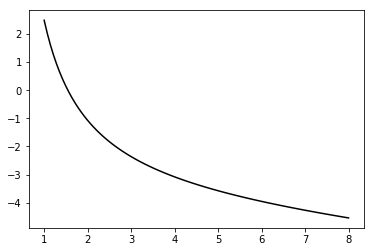

In [70]:
for I in range(16):
    print('Order :', I)
    param=Pseudo[I]*AV[int(OrderII[I])]
    err=Pseudo[I]*STD[int(OrderII[I]),:]
    ex=ID[I,:]
    print(names[I])
    print(ex)
    print(param)
    plt.plot(x , ansatz(ex[0] , ex[1] , ex[2] , x) , 'k')

    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + error1(err[0],err[1],err[2], x)  , alpha=0.4 , color='red')
    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - 3*error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + 3*error1(err[0],err[1],err[2], x)  , alpha=0.2 , color='yellow')

    #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
    plt.plot(x , ansatz(param[0] , param[1] , param[2] , x), 'r')
    plt.ylabel(amplitude_latex_names[I])
    plt.show()
#plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) + error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
Re($A_{\parallel}^L$)
Re($A_{\bot}^L$)
[-3.203249   -0.30399653  6.153234  ]
[ 4.944592   0.0351877 -9.854067 ]


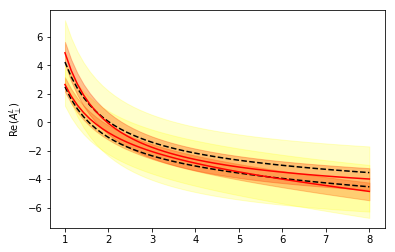

Im($A_{\parallel}^L$)
Im($A_{\bot}^L$)
[ 1.156212  -0.2077537 -2.2476172]
[-7.828978   1.0384823  9.163134 ]


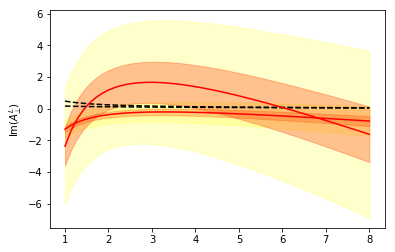

Re($A_{\parallel}^R$)
Re($A_{\bot}^R$)
[-3.0685985  0.521004  11.142641 ]
[-0.25762895  0.15284446 -8.730269  ]


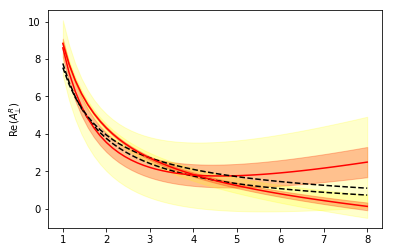

Im($A_{\parallel}^R$)
Im($A_{\bot}^R$)
[-0.68313915  0.07112717 -0.6192557 ]
[0. 0. 0.]


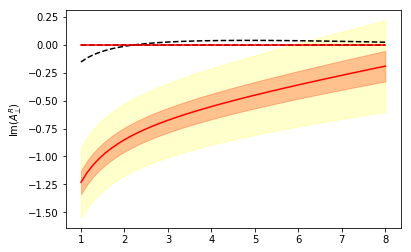

Re($A_{\bot}^L$)
Re($A_{\parallel}^L$)
[ 4.944592   0.0351877 -9.854067 ]
[-3.203249   -0.30399653  6.153234  ]


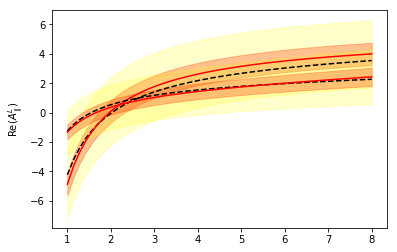

Im($A_{\bot}^L$)
Im($A_{\parallel}^L$)
[-7.828978   1.0384823  9.163134 ]
[ 1.156212  -0.2077537 -2.2476172]


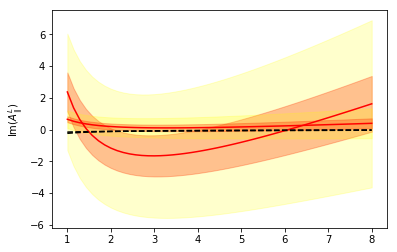

In [6]:
#Want to check for degeneracies 

x=np.linspace(1,8,50)

names=amplitude_latex_names

#print( toy_signalSM.coeffs[0] , toy_signalSM.coeffs[1] , toy_signalSM.coeffs[2])
#print( np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]))
#print(X)


Average=[]
StandarD=[]
for i in range(48):
    Average.append(np.mean(X[:,i]))
    StandarD.append(np.std(X[:,i]))

AV=np.reshape(Average,(16,3))
STD=np.reshape(StandarD,(16,3))

def ansatz(alpha, beta, gamma, q2):
    return alpha + beta*q2 + gamma/q2

def error1(sig_alpha, sig_beta, sig_gamma, q2):
    return np.sqrt(sig_alpha**2 + sig_beta**2*q2**2 + sig_beta**2/(q2**2))

def error2(alpha, beta, gamma, sig_alpha, sig_beta, sig_gamma, q2):
    sigA=(sig_alpha/alpha)**2
    sigB=(sig_beta/beta)**2
    sigC=(sig_gamma/gamma)**2
    return ansatz(alpha, beta, gamma, q2)*np.sqrt(sigA+sigB+sigC)
    
ID=np.reshape(toy_signalSM.coeffs,(16,3))

OrderI=np.arange(16)
OrderII=np.array([0, 5, 2, 1, 4, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
Pseudo=np.array([1 , -1 , 1 , -1 , 1 , -1 , 1, 1, 1 , 1 , 1 , 1 ,1 ,1 ,1 ,1])



# aproximate degeneracies in A_para_l & (- A_perp_l) ,  A_perp_l & (- A_para_l/2) ,  A_para_r & (- A_perp_r)
# corresponds to 


DEGENERACIES_IDX=[[0,4], [1 , 5],  [2,6], [3,7] , [4,0] , [5,1]]
Epsilon=[[1 , -1],[1 , -1], [1 , -1] , [1, -1] , [1 , -0.5],[1 , -0.5]]

print(fix_array)

for J in range(len(DEGENERACIES_IDX)):
    
    
    id1=DEGENERACIES_IDX[J][0]
    param1=Pseudo[id1]*AV[int(OrderII[id1]),:]
    err1=Pseudo[id1]*STD[int(OrderII[id1]),:]
    ex1=ID[id1,:]

    id2=DEGENERACIES_IDX[J][1]
    param2=Pseudo[id2]*AV[int(OrderII[id2]),:]
    err2=Pseudo[id2]*STD[int(OrderII[id2]),:]
    ex2=ID[id2,:]

    print(names[id1])
    print(names[id2])
    PARAM=[param1 , param2]
    ERR=[err1 , err2]
    EX=[ex1,ex2]
    compare=[id1 , id2]


    for j in range(len(compare)):

        id1=compare[j]
        ex1=EX[j]
        param1=PARAM[j]
        print(param1)
        err1=ERR[j]
        fac=Epsilon[J][j]

        plt.plot(x , fac*ansatz(ex1[0] , ex1[1] , ex1[2] , x) , 'k--')
        
        dy=error1(err1[0],err1[1],err1[2], x)
        #dy=error2(param1[0] , param1[1] , param1[2] ,err1[0],err1[1],err1[2], x)
        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - dy , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + dy  , alpha=0.3 , color='red')
        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - 3*dy , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + 3*dy  , alpha=0.2 , color='yellow')

        #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
        plt.plot(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x), 'r')
        plt.ylabel(amplitude_latex_names[id1])
    plt.show()


# Using the various data.csv files .. 


In [41]:
import pandas as pd

signal_coeffs = bmf.coeffs.signal(bmf.coeffs.SM)
Coef0=[i.numpy() for i in signal_coeffs] 
print(Coef0)


dataM = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data_new.csv")
dataM = dataM.values



[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]


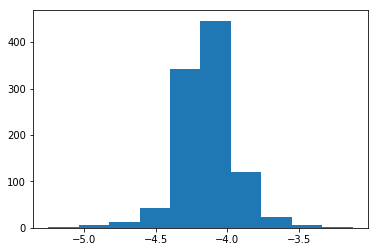

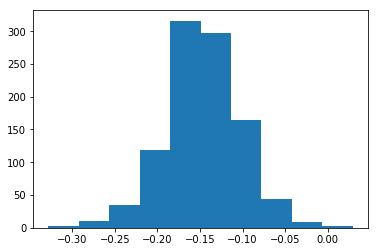

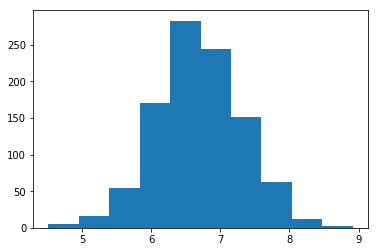

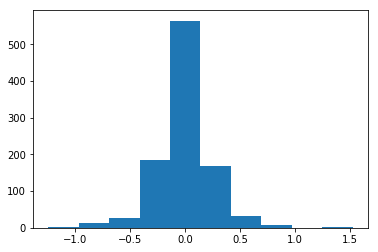

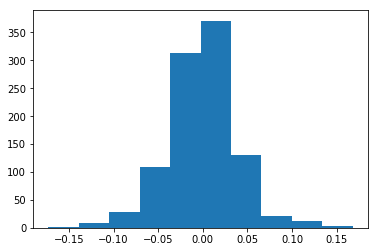

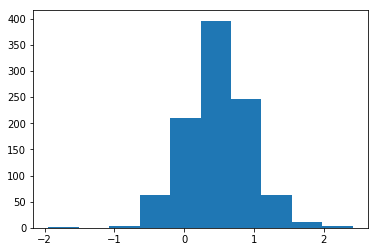

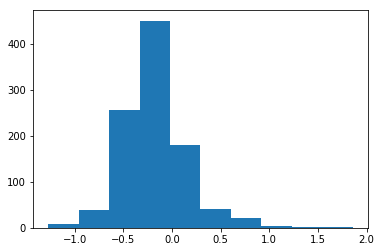

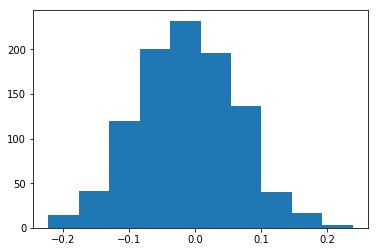

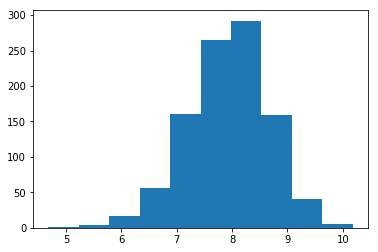

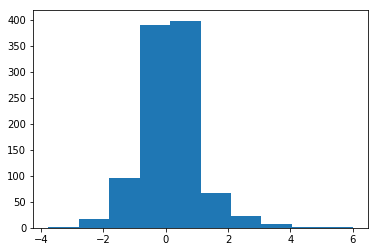

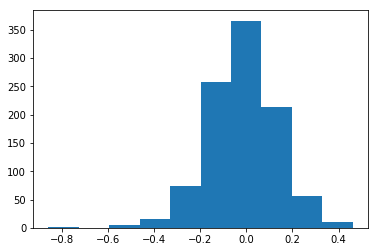

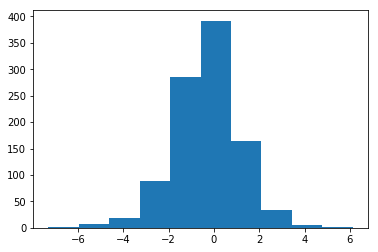

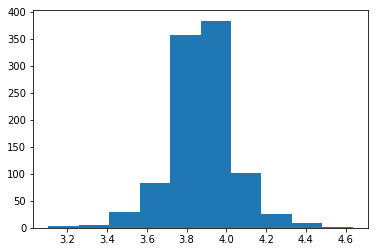

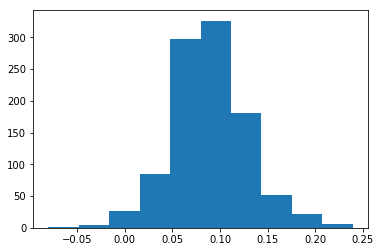

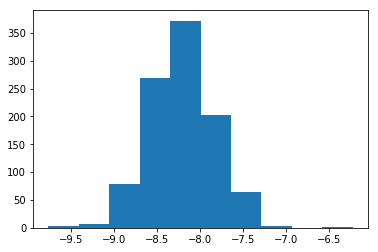

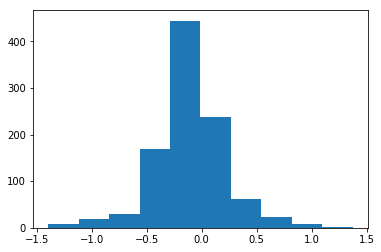

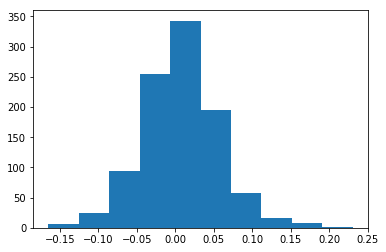

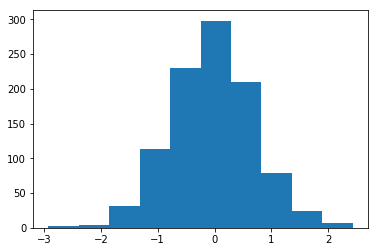

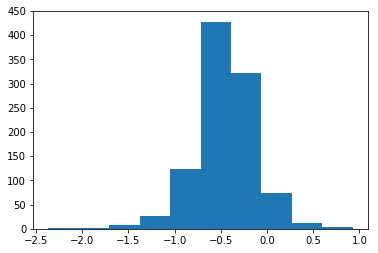

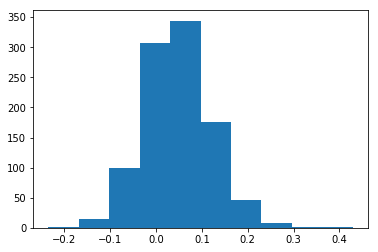

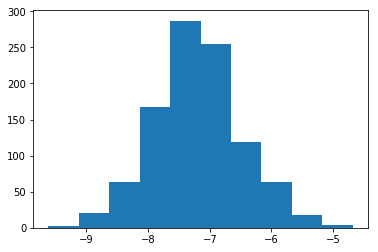

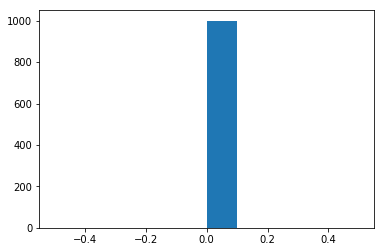

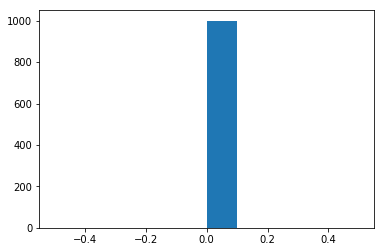

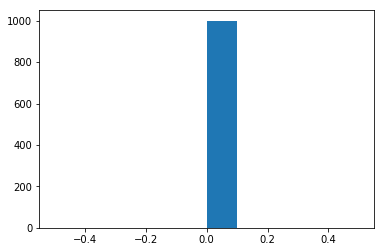

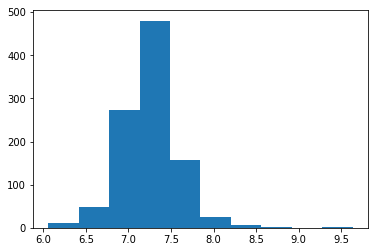

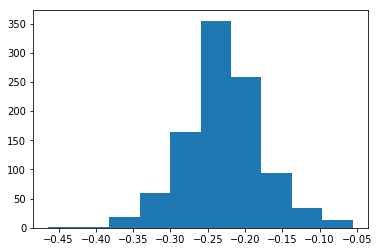

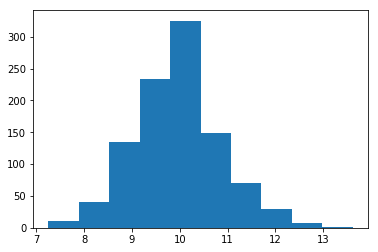

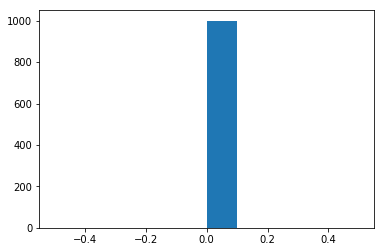

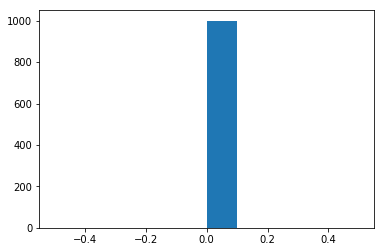

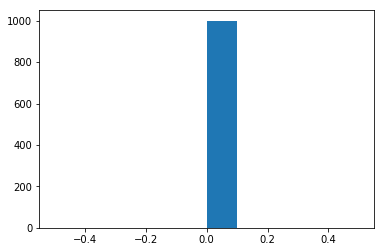

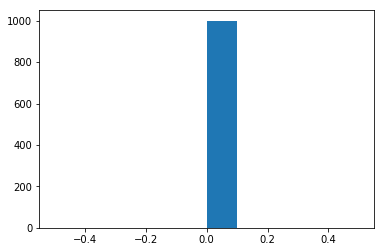

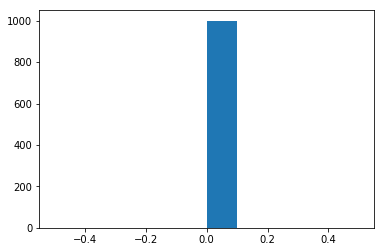

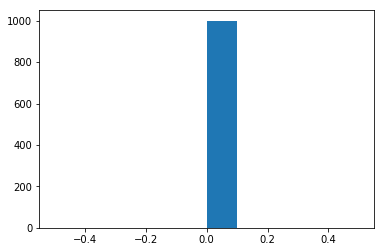

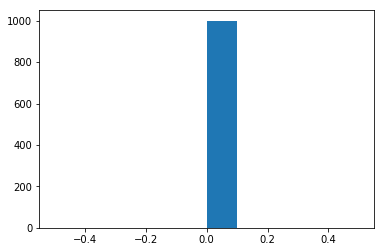

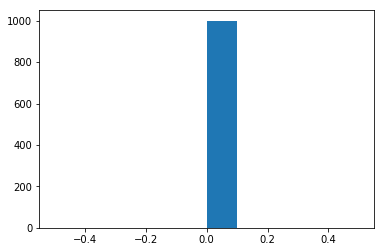

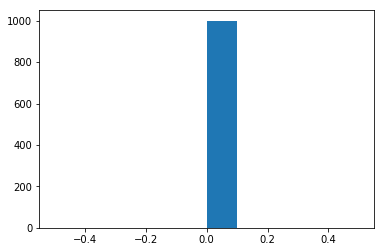

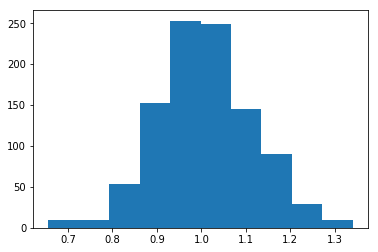

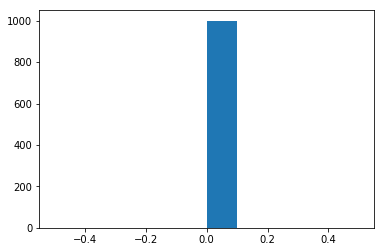

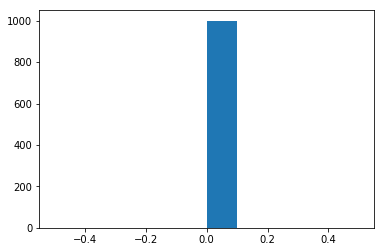

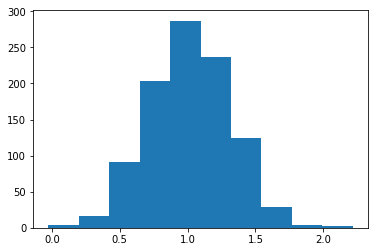

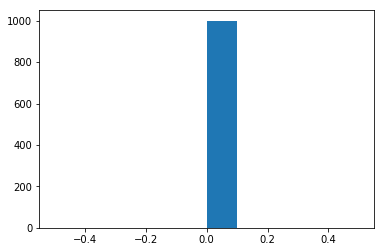

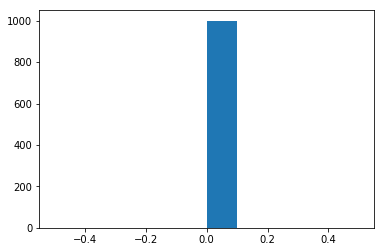

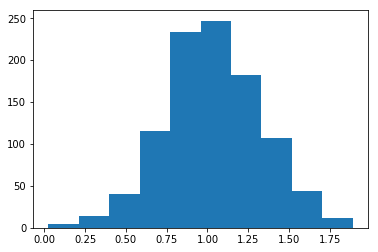

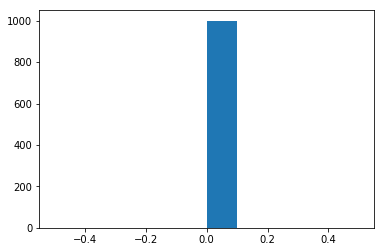

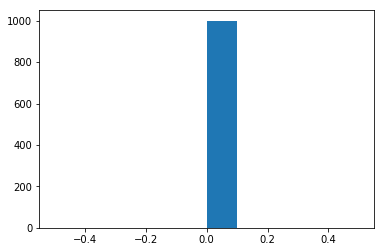

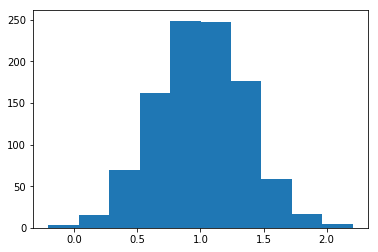

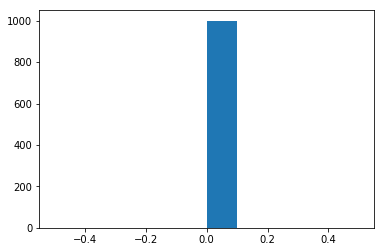

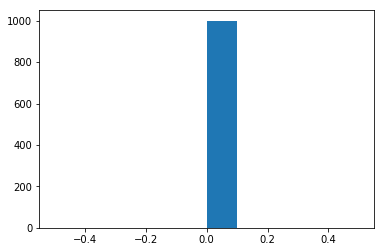

In [42]:
N=1000
coefs , errs = get_arrays(dataM , N)
for J in range(48):
    plt.hist(coefs[:,J])
    plt.show()
    

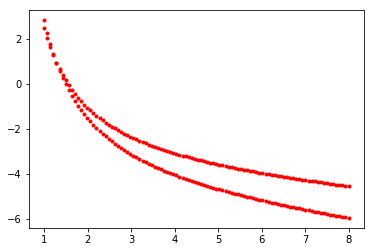

In [43]:
plt.plot(x , ansatz(np.mean(alpha) ,np.mean(beta), np.mean(gamma) , x) , 'r.')
plt.plot(x , ansatz(Coef0[0] ,Coef0[1], Coef0[2] , x) , 'r.')

# Using Lejambon error method 

48
[[-3.85794414 -0.20153721  7.32781627 ...  0.91730195  0.
   0.        ]
 [-3.94257163 -0.21261111  5.9797473  ...  1.71674782  0.
   0.        ]
 [-3.87067823 -0.19294941  5.7632531  ...  0.39284982  0.
   0.        ]
 ...
 [-3.99364661 -0.22340426  6.90875387 ...  1.4081038   0.
   0.        ]
 [-4.17917537 -0.21639387  7.3865524  ...  1.2380395   0.
   0.        ]
 [-4.02857435 -0.12640249  5.30045158 ...  1.00318422  0.
   0.        ]]


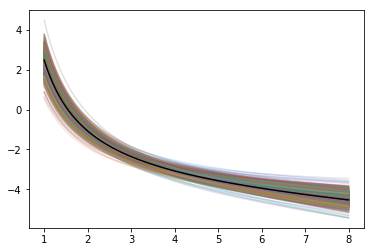

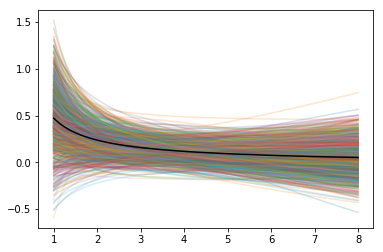

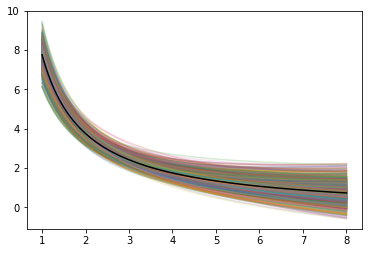

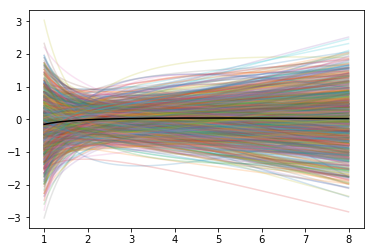

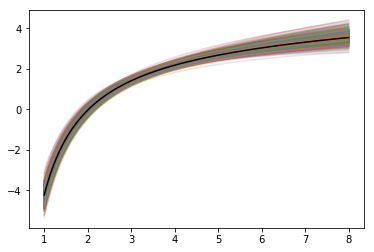

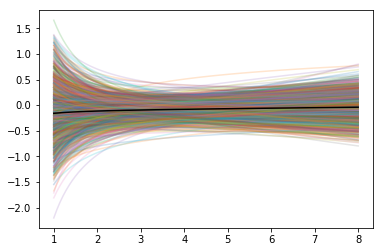

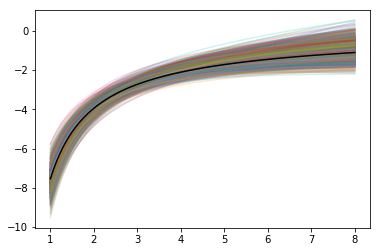

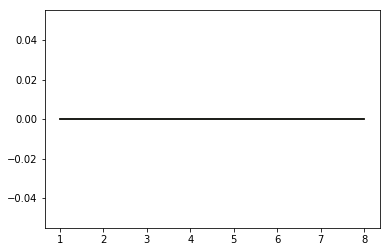

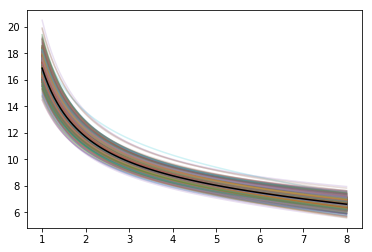

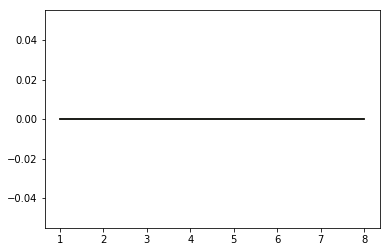

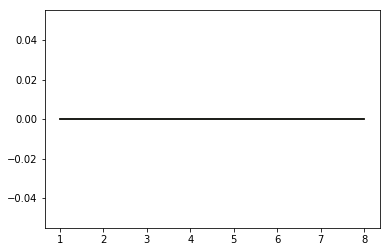

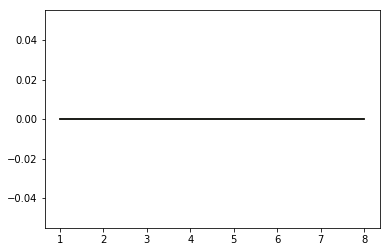

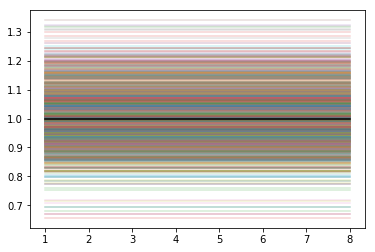

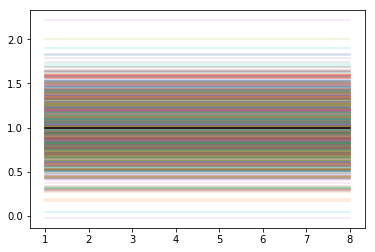

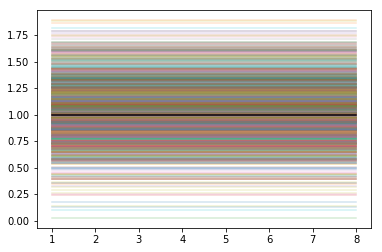

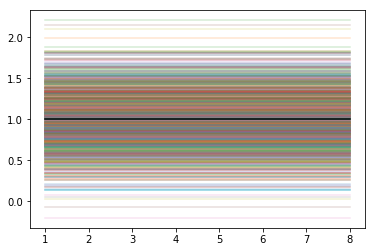

In [72]:
'''

mean=np.reshape(np.mean(X , axis=0),(16,3))
data=[]
for j in range(len(X[:,0])):   
    data.append(ansatz(X[j,0],X[j,1],X[j,2],x))
    plt.plot(x , data[j] , 'yellow')
idx=0
#print(mean)



#print(AV)
data=np.asarray(data)

'''
q2_range=np.linspace(bmf.signal.q2_min, bmf.signal.q2_max, 100)
x=np.linspace(1,8,100)
max_68=[]
max_95=[]
min_68=[]
min_95=[]

data=coefs

AV=np.mean(data , axis=0)
print(len(AV))
min_68, max_68, min_95, max_95 = ([] for i in range(4))
print(data)


for k in range(0,48,3):
    for j in range(len(data[:,0])):
        plt.plot(x , ansatz(data[j,k] ,data[j,k+1] ,data[j,k+2] , x) , alpha=0.2)
    plt.plot(x ,ansatz(Coef0[k] ,Coef0[k+1] ,Coef0[k+2] , x) , 'k' )
    plt.show()

In [ ]:

above_mean=sorted(j for j in data[:,0] if j > AV[0])
#print(above_mean)
for i, q2 in enumerate(q2_range-1):
    print(i , q2)
    #print(sorted(data[:,i]))
    #print(AV[i])
    lim=AV[i]
    dattt=[]

    above_mean=sorted(j for j in data[:,i] if j > lim )
    below_mean=sorted(j for j in data[:,i] if j < lim ) 
    
    below_mean=sorted(below_mean, reverse=True)
    
    #print(len(above_mean))
    
    max_68.append(above_mean[int((len(above_mean) - 1) * 0.68)])
    max_95.append(above_mean[int((len(above_mean) - 1) * 0.95)])
    
    min_68.append(below_mean[int((len(below_mean) - 1) * 0.68)])
    min_95.append(below_mean[int((len(below_mean) - 1) * 0.95)])
    
    '''
    print(AV[i])
    print(above_mean )
    print(below_mean, '\n')
    #sorted(i for i in j if i >= ansatz(mean[]))
    '''
    
plt.plot(x , max_68)
plt.plot(x , min_68)
plt.plot(x , max_95)
plt.plot(x , min_95)
plt.show()





[[-3.85794414 -0.20153721  7.32781627]
 [-3.94257163 -0.21261111  5.9797473 ]
 [-3.87067823 -0.19294941  5.7632531 ]
 ...
 [-3.99364661 -0.22340426  6.90875387]
 [-4.17917537 -0.21639387  7.3865524 ]
 [-4.02857435 -0.12640249  5.30045158]]
(1000, 3)
20


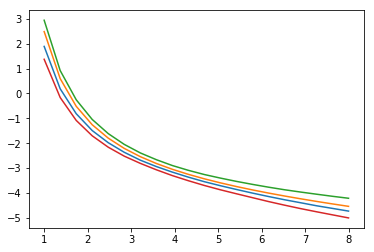

In [182]:
dataA=data[:,0:3]
print(dataA)
print(dataA.shape)



x=np.linspace(1,8,20)

def get_68(dataA,x):
    
    mean=np.mean(dataA , axis=0)
    #print(mean)
    min_68=[]
    max_68=[]
    for I in range(len(x)):
        #print(i , q2)
        #print(sor)ted(data[:,i]))
        
        distrib=[]
        for k in range(len(dataA[:,0])):

            distrib.append(ansatz(dataA[k,0],dataA[k,1],dataA[k,2],x[I]))
        
        lim=np.mean(distrib)#print(distrib)
        
        #print(distrib)
        #print(distrib)
        #print(lim)
        above_mean=sorted(j for j in distrib if j > lim )
        below_mean=sorted(j for j in distrib if j < lim ) 

        below_mean=sorted(below_mean, reverse=True)

        #print(len(below_mean))

        max_68.append(above_mean[int((len(above_mean) - 1) * 0.68)])

        min_68.append(below_mean[int((len(below_mean) - 1) * 0.68)])
        
    return min_68 , max_68


def get_95(dataA,x):
    
    mean=np.mean(dataA , axis=0)
    #print(mean)
    min_95=[]
    max_95=[]
    for I in range(len(x)):
        #print(i , q2)
        #print(sor)ted(data[:,i]))
        
        distrib=[]
        for k in range(len(dataA[:,0])):

            distrib.append(ansatz(dataA[k,0],dataA[k,1],dataA[k,2],x[I]))
        
        lim=np.mean(distrib)#print(distrib)
        
        #print(distrib)
        #print(distrib)
        #print(lim)
        above_mean=sorted(j for j in distrib if j > lim )
        below_mean=sorted(j for j in distrib if j < lim ) 

        below_mean=sorted(below_mean, reverse=True)

        #print(len(below_mean))

        max_95.append(above_mean[int((len(above_mean) - 1) * 0.95)])

        min_95.append(below_mean[int((len(below_mean) - 1) * 0.95)])
        
    return min_95 , max_95




minn, maxx =get_68(dataA ,x)
minnI, maxxI =get_95(dataA ,x)
print(len(minn))
plt.plot(x , minn)
plt.plot(x , ansatz(Coef0[0], Coef0[1] , Coef0[2] , x))
plt.plot(x , maxx)
plt.plot(x , minnI)

(1000, 48)

0
(1000, 3)
100


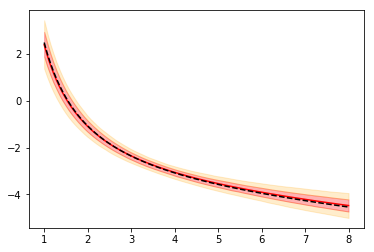

3
(1000, 3)
100


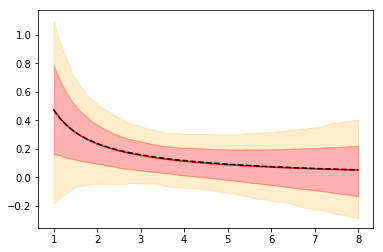

6
(1000, 3)
100


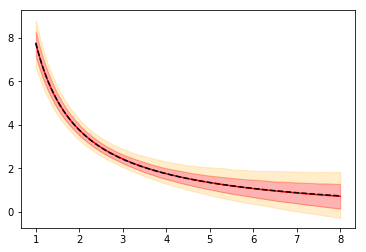

9
(1000, 3)
100


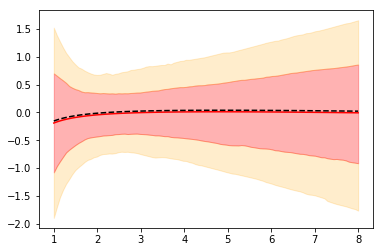

12
(1000, 3)
100


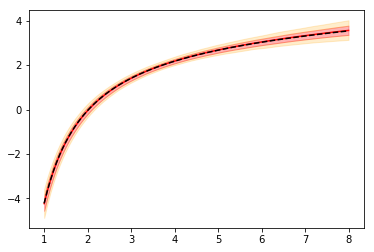

15
(1000, 3)
100


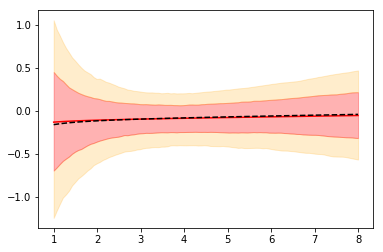

18
(1000, 3)
100


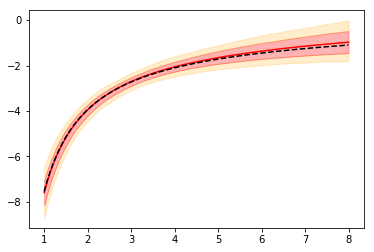

24
(1000, 3)
100


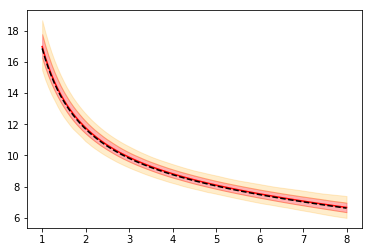

36
(1000, 3)
100


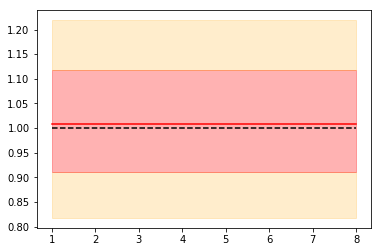

39
(1000, 3)
100


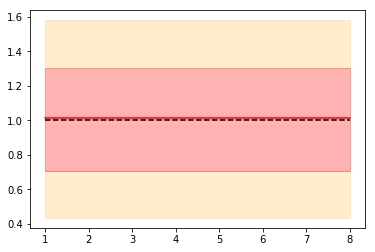

42
(1000, 3)
100


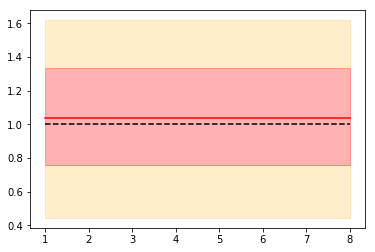

45
(1000, 3)
100


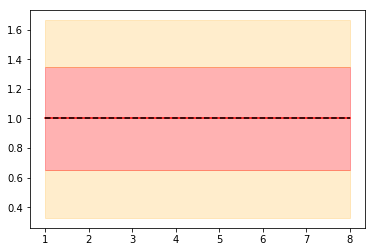

In [196]:
data=coefs

print(data.shape)
print()

for j in range(0,48,3):
    if fix_array[j]==0:
        print(j)
        q2_range=np.linspace(bmf.signal.q2_min, bmf.signal.q2_max, 100)
        x=np.linspace(1,8,100)
        max_68=[]
        max_95=[]
        #print(feed[:,0])
        dattt=data[:,j:j+3]
        
        mean=np.mean(dattt , axis=0)
        print(dattt.shape)
        min68 , max68= get_68(dattt ,x)
        min95 , max95= get_95(dattt ,x)
        print(len(min68))

        #plt.plot(x,min68 , 'r' , alpha =0.3)
        #plt.plot(x,max68 , 'r' , alpha =0.3)
        #plt.plot(x,min95 , 'r' , alpha =0.3)
        #plt.plot(x,max95 , 'r' , alpha =0.3)
        
        plt.plot(x, ansatz(mean[0],mean[1],mean[2],x) , 'r')
        plt.plot(x, ansatz(Coef0[j],Coef0[j+1],Coef0[j+2],x) , 'k--')
        plt.fill_between(x , min95 , min68 , color='orange' , alpha=0.2)
        plt.fill_between(x , min68 , max68 , color='red' , alpha=0.3)
        plt.fill_between(x , max68 , max95 , color='orange' , alpha=0.2)
    
        plt.show()
    